# __Pipeline 2:__
## _IQR --> Min Max --> Normalization_

# Importing Data:

In [210]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [211]:
# Upload csv dataset
# Make sure all values that are filled in with a dash('-') are treated as NaNs. 
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics:

In [212]:
compdata_original.shape

# 682 rows and 22 columns

(682, 22)

In [213]:
compdata_original.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [214]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [215]:
# check types of data
compdata_original.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

In [216]:
# Create a copy of the data so we aren't altering original dataframe
compdata = compdata_original.copy()

# Variable Calculations:

In [217]:
# Impute the rows T2 values!!!! mean
# Cannot do ratio calculations with missing data on the number of words (will create outliers)
# Check to see if there are any 0 values in T2
compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0


In [218]:
# Replace 0.0 with the mean for continuous values
compdata.loc[125,'T2']=compdata['T2'].mean()

In [219]:
# Replace 0.0 with the mean for continuous values
compdata.loc[199,'T2']=compdata['T2'].mean()

In [220]:
# check for negatives:

# cannot have a negative number of long words (T5)
compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0


In [221]:
# replace negatives with the mean for continuous values
compdata.loc[7,'T5']=compdata['T5'].mean()

In [222]:
# cannot have a negative number of positive words (S1)
compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [223]:
# fill with the mean for continuous values
compdata.loc[134,'S1']=compdata['S1'].mean()

In [224]:
compdata.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

In [225]:
# Ratios: compute the ratios of the words and sentences

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation
# Compute the target variables: Y1 & Y2
# Create if statements for the control variable calcualtions

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing Data:

In [230]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [231]:
# total missing numbers per column
compdata.isna().sum()
# majority of data missing from C7

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [232]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.17
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
T3_         0.15
T4_         0.15
T5_         0.15
S1_         0.15
S2_         0.15
S3_         0.15
P(mid)      1.47
C3_         0.00
C5_         0.88
C6_         0.00
Y1          0.00
Y2          0.00
dtype: float64

In [233]:
# Since C2 is a binary value, we will fill the missing data with the mode
compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])

In [234]:
# fill C7 missing data with the mean because it is continuous
compdata['Imputed_C7'] = compdata['C7'].fillna(compdata['C7'].mean())

In [235]:
# Drop missing P Values
compdata = compdata.dropna(subset=['P(1Day)'], axis=0, how='any')

In [236]:
# reset the index so there are no skipped index numbers from the row drops
compdata.reset_index(drop=True, inplace=True)

In [237]:
# check to see if there is any more missing data
compdata.isna().sum()
# all the missing data has been taken care of

I1             0
I2             0
I3             0
P(IPO)         0
P(H)           0
P(L)           0
P(1Day)        0
C1             0
C2             0
C3            24
C4             0
C5             0
C6             0
C7            60
T1             0
T2             0
T3             0
T4             0
T5             0
S1             0
S2             0
S3             0
T3_            0
T4_            0
T5_            0
S1_            0
S2_            0
S3_            0
P(mid)         0
C3_            0
C5_            0
C6_            0
Y1             0
Y2             0
Imputed_C2     0
Imputed_C7     0
dtype: int64

In [238]:
# final shape of the dataframe
compdata.shape
# 660 rows, 36 columns

(660, 36)

# Create Seperate Dataframes:

In [239]:
# Create DF with continuous features:

# Keep the imputed variable colmuns & drop the originals
# Drop the P values
# Drop Y1 Y2 (seperate df for target variables)
# Drop T1 and T2 because they were used for imputations of the ratios

compdata_cont = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1','I2','I3','T3','T1','T2','T4','T5','C3_','S1','S2','S3','C2','C3','C5','C6','C7','Imputed_C2','Y1','Y2'], axis=1)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111,51.345
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000,25.936
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000,7.378
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000,8.526
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000,632.298


In [240]:
# Create DF with categorical features:

# the only categorical features being used are C3_ and Imputed_C2

compdata_cat = compdata.drop(['P(IPO)','P(H)','I1','I2','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Y1','Y2','Imputed_C7'], axis=1)
compdata_cat.head()

,C3_,Imputed_C2
0,1,1.0
1,0,0.0
2,0,1.0
3,0,1.0
4,1,1.0


In [241]:
# Create DF with target values:

targetvals = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','I1','I2','C3_','Imputed_C2','Imputed_C7'], axis=1)
targetvals.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


# __Pipeline 2:__

## Interquartile Ratio:

In [244]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 

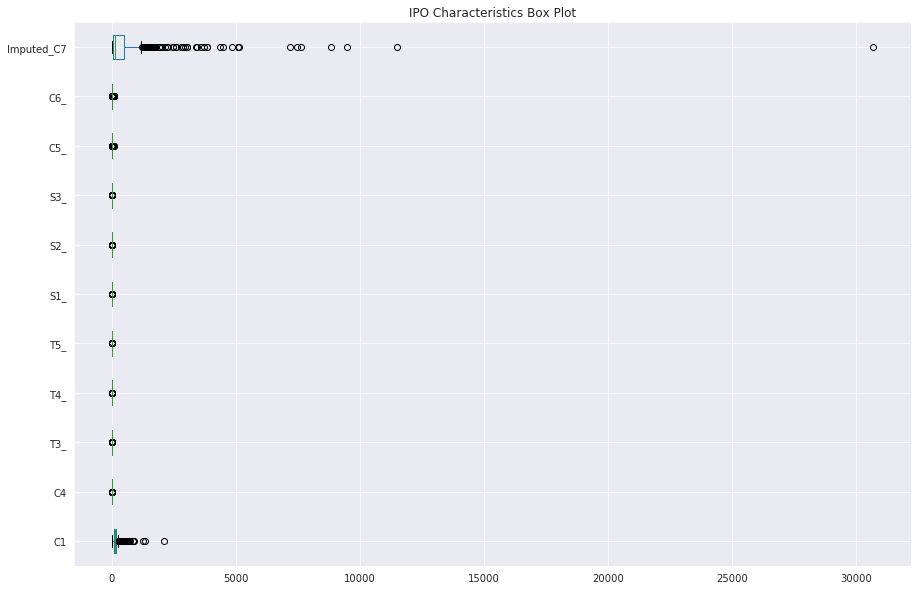

In [245]:
# visualize whole dataset in a boxplot
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

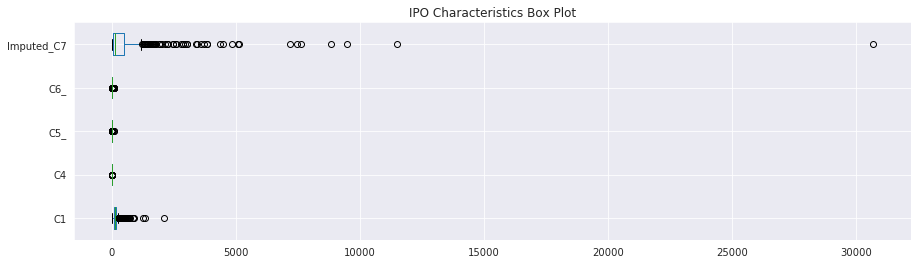

In [246]:
# Split it up into smaller variable groupings to better visualize the outliers 
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','Imputed_C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

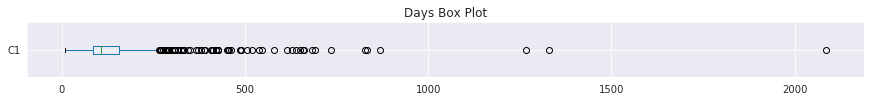

In [247]:
compdata_cont.boxplot(column=['C1'],vert=False, figsize=(15,1))
plt.title('Days Box Plot')
plt.show()

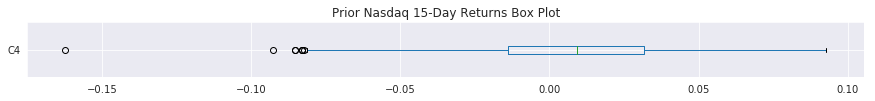

In [248]:
compdata_cont.boxplot(column='C4',vert=False, figsize=(15,1))
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

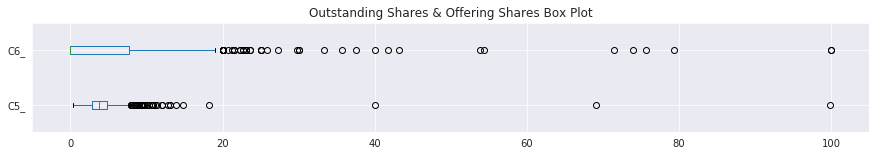

In [249]:
compdata_cont.boxplot(column=['C5_','C6_'],vert=False, figsize=(15,2))
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

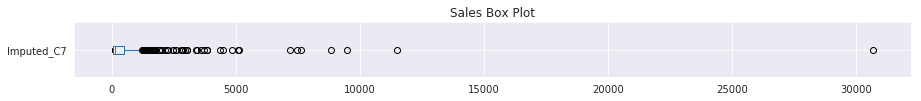

In [250]:
compdata_cont.boxplot(column='Imputed_C7',vert=False, figsize=(15,1))
plt.title('Sales Box Plot')
plt.show()

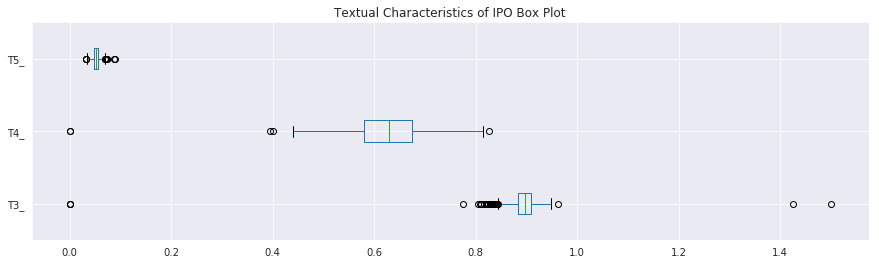

In [251]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

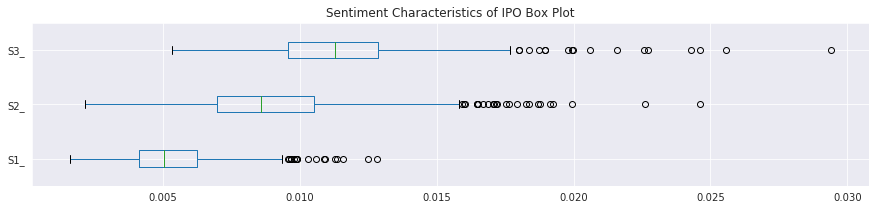

In [252]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

In [253]:
# It is obvious that there are outliers in the dataset that will offset the results. 
# To remove this data we will use the interquartile range to determine the upper and lower bound 
# limits and any data outside the limit will be converted to either the lower or upper bound number.

In [254]:
# use a for loop thorugh the columns to determine and replace the numbers outside the upper and lower bound
# use IQR to determine the upper and lower bound limits
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].quantile(0.75) + (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [255]:
for col in compdata_cont.columns:
    l_bound = compdata_cont[col].quantile(0.25) - (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

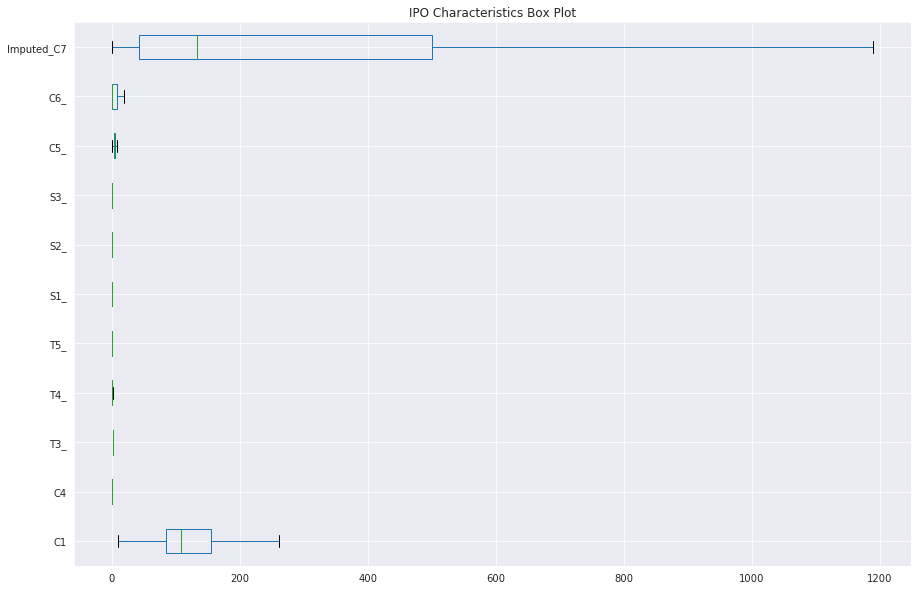

In [256]:
# check to make sure all the outliers are removed
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

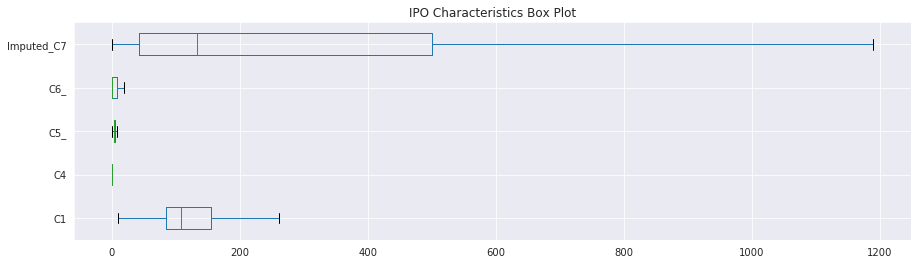

In [257]:
# Split it up into smaller variable groupings to better visualize the results 
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','Imputed_C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

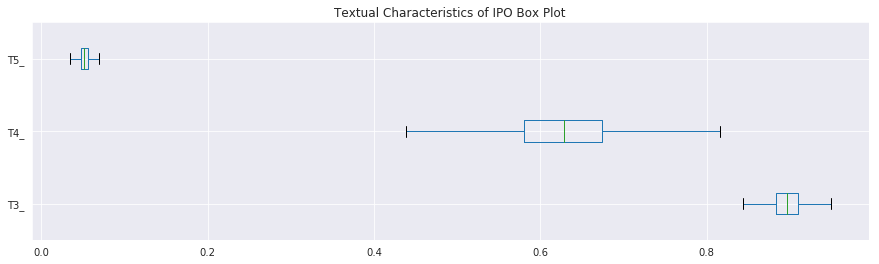

In [258]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

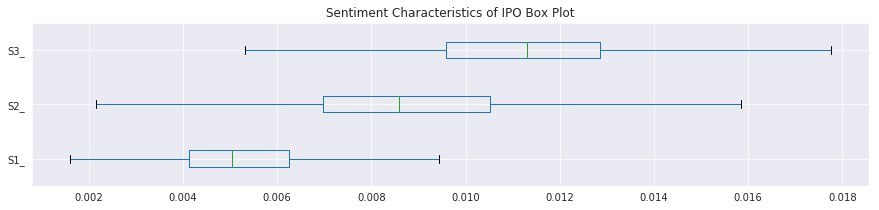

In [259]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

#  Min Max

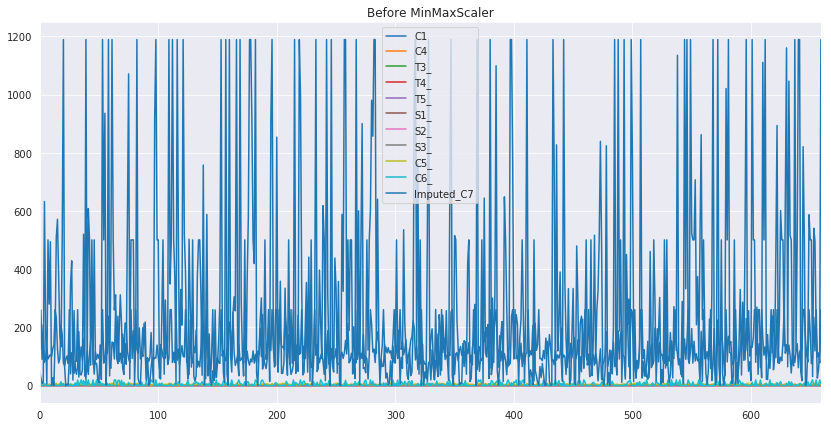

In [260]:
# Scale the data before normalization

# first visualize the original data in a line graph
compdata_cont.plot(figsize=(14,7))
plt.title('Before MinMaxScaler')
plt.show()
# Y axis ranges from 0 to 1200

In [261]:
# use MinMaxScaler to transform the data to fit
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
compdata_cont = scaler.fit_transform(compdata_cont)

# rename the df to make it easier to continue with normalization 
compdata_cont_transform = pd.DataFrame(compdata_cont)

In [262]:
# rename the columns back to original after transformation
compdata_cont_transform.columns=['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C7']

In [263]:
# confirm all the data is between 0 and 1 (min and max)
compdata_cont_transform.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.466482,0.511836,0.480269,0.502032,0.504195,0.470261,0.498137,0.490806,0.491270,0.226921,0.252540
std,0.255740,0.187110,0.208896,0.185703,0.189201,0.210688,0.200629,0.202996,0.217252,0.334435,0.302125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299252,0.389826,0.375000,0.375000,0.375000,0.323044,0.351299,0.342294,0.338457,0.000000,0.034809
50%,0.387032,0.521497,0.507031,0.503893,0.496929,0.438733,0.468926,0.480832,0.454520,0.000000,0.111893
75%,0.579551,0.649710,0.625000,0.625000,0.625000,0.593826,0.610780,0.605376,0.603074,0.400000,0.420885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


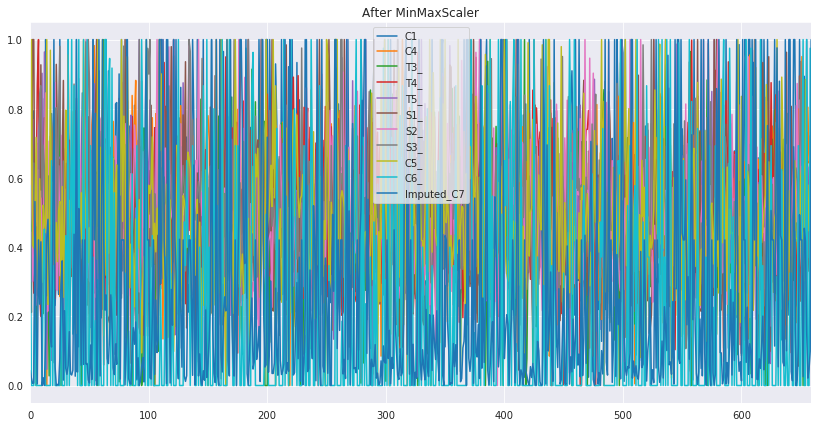

In [264]:
# create a visualization after MinMaxScaler to view the change in the data
# the y axis now ranges from 0 to 1 and the values are scaled
compdata_cont_transform.plot(figsize=(14,7))
plt.title('After MinMaxScaler')
plt.show()

## Normalization: 

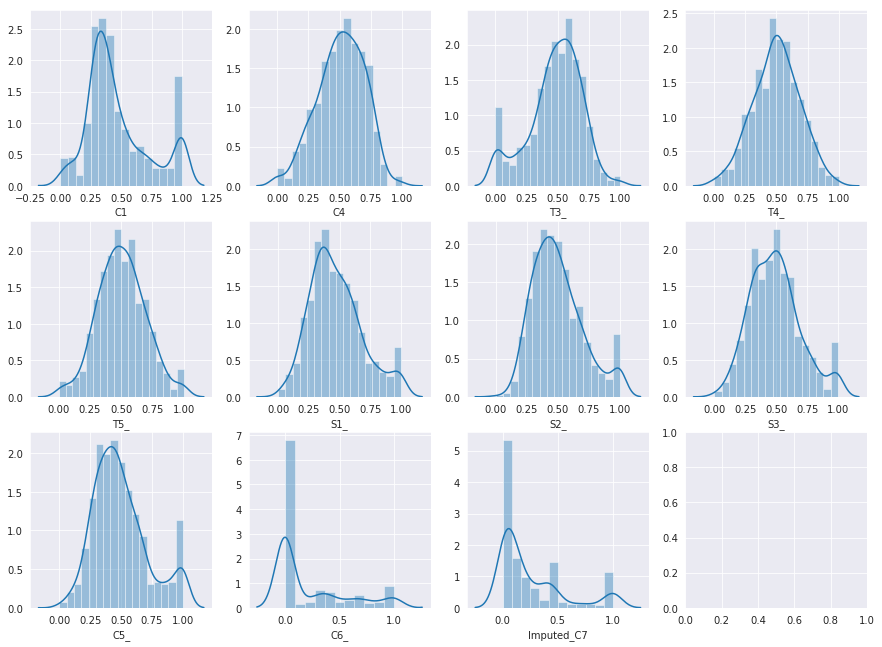

In [268]:
# visualize each variable into subplots to see the skewness and distributuion of the data before normalizing

f, axes = plt.subplots(3, 4, figsize=(15,11), sharex=False)
sns.distplot( compdata_cont_transform["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont_transform["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont_transform["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont_transform["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont_transform["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont_transform["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont_transform["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont_transform["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont_transform["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont_transform["C6_"] , ax=axes[2, 1])
sns.distplot( compdata_cont_transform["Imputed_C7"] , ax=axes[2, 2])
plt.show()

In [269]:
compdata_cont_transform.skew()
# view the skewness of the data
# check if its left or right skewed
# close to 0 is normal (T4_).. [-.5 - .5]
# Positive Skew: --> log
# Negative Skew: --> exponential

C1            0.836620
C4           -0.314465
T3_          -0.545971
T4_          -0.073967
T5_           0.110769
S1_           0.608468
S2_           0.694781
S3_           0.476608
C5_           0.724354
C6_           1.201653
Imputed_C7    1.437034
dtype: float64

In [270]:
# use scipy.stats.yeojohnson and boxcox to normalize the data:
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox
# to use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
# add [0] to output 1 column without adding the lambda column

In [271]:
compdata_cont_transform['C1_skew'] = stats.yeojohnson(compdata_cont_transform['C1'])[0]

In [272]:
compdata_cont_transform['C4_skew'] = stats.yeojohnson(compdata_cont_transform['C4'])[0]

In [273]:
compdata_cont_transform['T3_skew'] = stats.yeojohnson(compdata_cont_transform['T3_'])[0]

In [274]:
compdata_cont_transform['T4_skew'] = stats.yeojohnson(compdata_cont_transform['T4_'])[0]

In [275]:
compdata_cont_transform['T5_skew'] = stats.yeojohnson(compdata_cont_transform['T5_'])[0]

In [276]:
compdata_cont_transform['S1_skew'] = stats.yeojohnson(compdata_cont_transform['S1_'])[0]

In [277]:
compdata_cont_transform['S2_skew'] = stats.yeojohnson(compdata_cont_transform['S2_'])[0]

In [278]:
compdata_cont_transform['S3_skew'] = stats.yeojohnson(compdata_cont_transform['S3_'])[0]

In [279]:
compdata_cont_transform['C5_skew'] = stats.yeojohnson(compdata_cont_transform['C5_'])[0]

In [280]:
compdata_cont_transform['C6_skew'] = stats.yeojohnson(compdata_cont_transform['C6_'])[0]

In [281]:
compdata_cont_transform['Imputed_C7_skew'] = stats.yeojohnson(compdata_cont_transform['Imputed_C7'])[0]

In [282]:
# check the skewness after the normalization methods
compdata_cont_transform.skew()

C1                 0.836620
C4                -0.314465
T3_               -0.545971
T4_               -0.073967
T5_                0.110769
S1_                0.608468
S2_                0.694781
S3_                0.476608
C5_                0.724354
C6_                1.201653
Imputed_C7         1.437034
C1_skew            0.015976
C4_skew           -0.035032
T3_skew           -0.032091
T4_skew           -0.009701
T5_skew            0.002485
S1_skew            0.007875
S2_skew            0.014766
S3_skew            0.001692
C5_skew            0.005550
C6_skew            0.609398
Imputed_C7_skew    0.383248
dtype: float64

In [283]:
# C6 is still skewed over .5, use cubed root to bring it closer to normal
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'].skew()

0.4810367830161171

In [285]:
# confirm the final skewness is between the range of [-.5 and .5]
compdata_cont_transform.skew()

C1                 0.836620
C4                -0.314465
T3_               -0.545971
T4_               -0.073967
T5_                0.110769
S1_                0.608468
S2_                0.694781
S3_                0.476608
C5_                0.724354
C6_                1.201653
Imputed_C7         1.437034
C1_skew            0.015976
C4_skew           -0.035032
T3_skew           -0.032091
T4_skew           -0.009701
T5_skew            0.002485
S1_skew            0.007875
S2_skew            0.014766
S3_skew            0.001692
C5_skew            0.005550
C6_skew            0.481037
Imputed_C7_skew    0.383248
dtype: float64

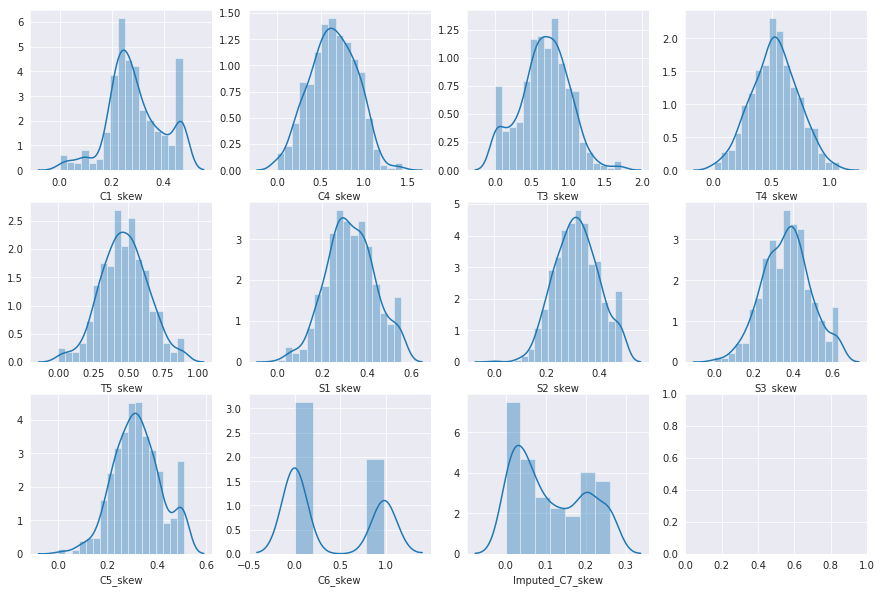

In [287]:
# visualize the newly normalized columns to see the changes and confirm normalized data
f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=False)
sns.distplot( compdata_cont_transform["C1_skew"] , ax=axes[0, 0])
sns.distplot( compdata_cont_transform["C4_skew"] , ax=axes[0, 1])
sns.distplot( compdata_cont_transform["T3_skew"] , ax=axes[0, 2])
sns.distplot( compdata_cont_transform["T4_skew"] , ax=axes[0, 3])
sns.distplot( compdata_cont_transform["T5_skew"] , ax=axes[1, 0])
sns.distplot( compdata_cont_transform["S1_skew"] , ax=axes[1, 1])
sns.distplot( compdata_cont_transform["S2_skew"] , ax=axes[1, 2])
sns.distplot( compdata_cont_transform["S3_skew"] , ax=axes[1, 3])
sns.distplot( compdata_cont_transform["C5_skew"] , ax=axes[2, 0])
sns.distplot( compdata_cont_transform["C6_skew"] , ax=axes[2, 1])
sns.distplot( compdata_cont_transform["Imputed_C7_skew"] , ax=axes[2, 2])
plt.show()

## Binning:

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-0999 | Agriculture, Forestry and Fishing |
| 1000-1499 | Mining |
| 1800-1999 | not used |
| 2000-3999 | Manufacturing |
| 4000-4999 | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199 | Wholesale Trade |
| 5200-5999 | Retail Trade |
| 6000-6799 | Finance, Insurance and Real Estate |
| 7000-8999 | Services |
| 9100-9729 | Public Administration |
| 9900-9999 | Nonclassifiable |


In [288]:
# in order to bin, I3 must be a integer
# locate the rows that have strings
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2,Imputed_C7
170,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1,1.0,289.041


In [289]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2,Imputed_C7
183,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1,0.0,41.056


In [290]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2,Imputed_C7
483,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1,1.0,39.675


In [292]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2,Imputed_C7
599,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.008835,0.00956,8.0,1,1.666667,0.0,1,1,0.0,81.275


In [293]:
# Replace I3 values with one value.
# placed them in sensible industry based on the most common industries of the 4 values.
compdata.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [294]:
compdata.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [295]:
compdata.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [296]:
compdata.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [297]:
compdata.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [298]:
# convert the I3 variables to integers in order to bin 
compdata["I3"] = pd.to_numeric(compdata["I3"])

In [300]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column 'I3_bins' in the categorical dataframe according to the industry/grouping

compdata_cat['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  

compdata_cat.head()

,C3_,Imputed_C2,I3_bins
0,1,1.0,5
1,0,0.0,5
2,0,1.0,5
3,0,1.0,5
4,1,1.0,6


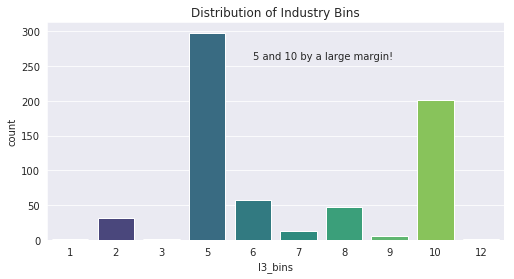

In [302]:
# visualize the distribution of industry bins through a histogram

sns.set_style("darkgrid")
plt.figure(figsize=(18,4))

# PLOT - distribution of industry bins
plt.subplot(1,2,1)
plt.text(4,260,"5 and 10 by a large margin!")
ax = sns.countplot(x="I3_bins", data=compdata_cat, palette="viridis")
ax.set(title="Distribution of Industry Bins")

plt.show()

## New Bins:

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-1999 | Other |
| 2000-3999 | Manufacturing |
| 4000-6799 | Other |
| 7000-8999 | Services |
| 9100-9999 | Other |

In [303]:
# Combine bins to create an even smaller, and more even binning range of 5

def assign_I3_bins_new(I3):
    if I3 >= 100 and I3 <= 1999:                          
        return(1)
    if I3 >= 2000 and I3 <= 3999:                  
        return(2)
    if I3 >= 4000 and I3 <= 6799:                  
        return(1)
    if I3 >= 7000 and I3 <= 8999:                  
        return(3)
    if I3 >= 9000 and I3 <= 9999:                  
        return(1)   
    
    # Creating a new column I3_bins_new in the compdata_cat

compdata_cat['I3_bins_new'] = compdata['I3'].apply(assign_I3_bins_new)  

compdata_cat.head()

,C3_,Imputed_C2,I3_bins,I3_bins_new
0,1,1.0,5,2
1,0,0.0,5,2
2,0,1.0,5,2
3,0,1.0,5,2
4,1,1.0,6,1


In [304]:
# drop the original bins after creating the new bins
compdata_cat = compdata_cat.drop('I3_bins', axis=1)
compdata_cat.head()

,C3_,Imputed_C2,I3_bins_new
0,1,1.0,2
1,0,0.0,2
2,0,1.0,2
3,0,1.0,2
4,1,1.0,1


## Correlation

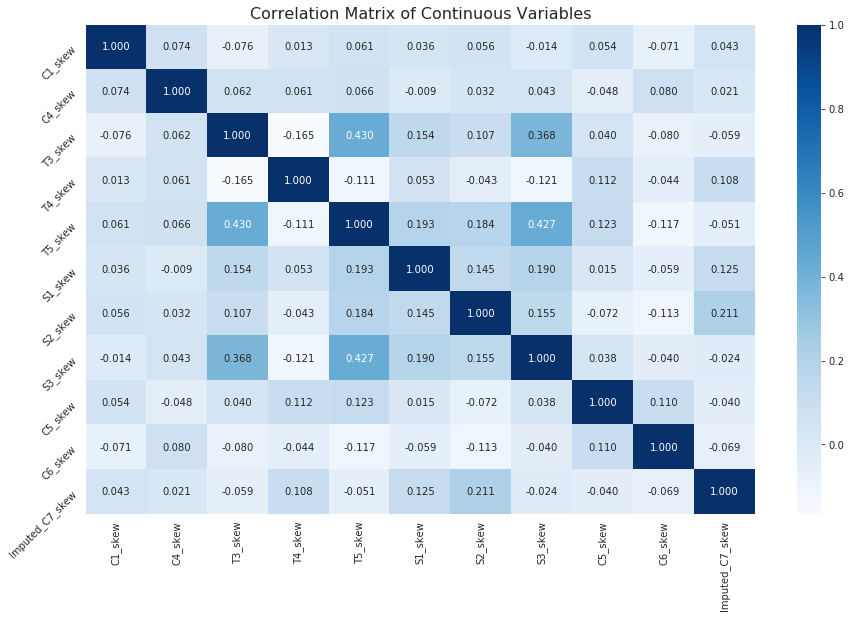

In [311]:
# Create correlation matrix to visualize which variables correlate with eachother
compdata_cont_corr = compdata_cont_transform.drop(['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C7'], axis=1)
corr = compdata_cont_corr.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.yticks(rotation = 45)
plt.title('Correlation Matrix of Continuous Variables', fontsize=16);
plt.show()

In [312]:
# join back together all 3 dataframes: continuous, categorical, target values
# final dataframe from the pipeline
pipeline2 = pd.concat([compdata_cont_corr,compdata_cat,targetvals], axis=1)
pipeline2.head()

,C1_skew,C4_skew,T3_skew,T4_skew,T5_skew,S1_skew,S2_skew,S3_skew,C5_skew,C6_skew,Imputed_C7_skew,C3_,Imputed_C2,I3_bins_new,Y1,Y2
0,0.298869,0.812673,0.880238,0.558137,0.525711,0.311141,0.332613,0.353448,0.324364,0.981162,0.039266,1,1.0,2,0,1
1,0.470469,0.461399,0.706297,0.570597,0.454929,0.179869,0.385485,0.350794,0.509756,-0.000000,0.020734,0,0.0,2,1,0
2,0.235968,0.739487,0.888695,0.547759,0.707478,0.554517,0.228020,0.376747,0.292113,-0.000000,0.006060,0,1.0,2,1,0
3,0.421064,0.733517,1.030714,0.273137,0.704293,0.554517,0.262803,0.463703,0.287358,-0.000000,0.006997,0,1.0,2,1,1
4,0.213477,0.302404,0.544654,0.406966,0.383341,0.285020,0.357360,0.369870,0.315654,0.977075,0.222187,1,1.0,1,0,1


In [97]:
# convert to a csv in order to use in feature selection and evaluation code
pipeline2.to_csv('../project1-deadlinedemons/pipeline2.csv', index=0)